In [2]:
import numpy as np
import math
from sympy import *
import matplotlib
import matplotlib.pyplot as plt

# Fibonacci Search algorithm

## Input: 
1. Objective function
2. Boundary points
4. Tolerance


## Compute:

1. Golden ratio
3. Stopping condition


## Visualisation:

Find the local minimum for the function

In [3]:
# Objective function: f(x)
#define variables and formula
x = symbols('x')
f =  abs(sin(2*pi*x)-10*(2*x-1))
#Value of function
f_val = lambdify([x],f)

# Golden-Section Search
1. Function f
2. a and b are boundary points
3. tol = tolerance 
4. Iter = max no. of iterations

In [44]:
def FibonacciGenerator(n):
    if n < 1:
        return 0
    elif n == 1:
        return 1
    else:
        return FibonacciGenerator(n - 1) + FibonacciGenerator(n - 2)

def Fibonacci_Search(f, a, b, tol, Iter):
    m = 1
    #store Fibonacci
    f_history = FibonacciGenerator(m)
    # find the max iteration
    L1 = b - a
    while L1/FibonacciGenerator(m) > tol and m < Iter:
        m += 1
        f_history = np.vstack((f_history,FibonacciGenerator(m)))
    #store history iterations
    a_history = a
    b_history = b
    k = 3
    while m+1 >k and k < Iter:
        #update delta
        delta =  f_history[m-k]/f_history[m+2-k]
        
        #compute boundary candidates
        x1 = b - delta*L1
        x2 = a + delta*L1
        
        #update boundary
        if f(x2) < f(x1):
            b = x1
        else:
            a = x2
            
        #store boundary
        a_history = np.vstack((a_history,a))
        b_history = np.vstack((b_history,b))
        
        #update iteration and L
        k +=1
        L1 = b - a
    return a_history,b_history

In [42]:
#run algorithm
a_init = -1
b_init = 1
a_History,b_History = Fibonacci_Search(f_val,a_init,b_init,1.0e-3,20)
N = len(a_History)

# Visualisation

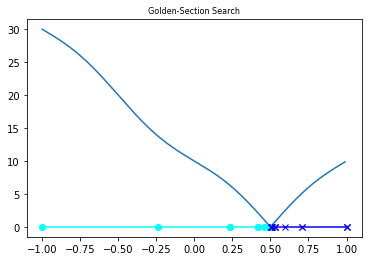

In [43]:
#from pylab import figure, cm
r_min, r_max = a_init, b_init 
Range = np.arange(r_min, r_max, 0.01)
value = f_val(Range)
plt.plot(Range, value)
plt.title("Golden-Section Search" , fontsize=8)
plt.plot(a_History,np.zeros(N),marker='o',c='cyan') 
plt.plot(b_History,np.zeros(N),marker='x',c='blue') 
plt.show()